In [67]:
import pandas
import numpy
from matplotlib import pyplot as plt

In [68]:
grades = pandas.read_csv("CSE20_SP24_A00_Spring_2024_grades.csv",
    usecols=["First Name", "Last Name", "SID", "Email",
             "hw1-definitions-and-notation","hw1-definitions-and-notation - Max Points",
             "hw2-numbers","hw2-numbers - Max Points",
             "hw3-circuits-and-logic","hw3-circuits-and-logic - Max Points",
             "hw4-proofs-and-sets","hw4-proofs-and-sets - Max Points",
             "hw5-proofs-and-induction","hw5-proofs-and-induction - Max Points",
             "hw6-proofs-cardinality-relations","hw6-proofs-cardinality-relations - Max Points",
             "Project","Project - Max Points",
             "Inclass Test 1 - V1 Smile", "Inclass Test 1 - V1 Smile - Max Points", 
             "Inclass Test 1 - V2 Check", "Inclass Test 1 - V2 Check - Max Points", 
             "Inclass Test 1 - V3 Star", "Inclass Test 1 - V3 Star - Max Points", 
             "Inclass Test 2 - V1 Smile", "Inclass Test 2 - V1 Smile - Max Points", 
             "Inclass Test 2 - V2 Check", "Inclass Test 2 - V2 Check - Max Points", 
             "Inclass Test 2 - V3 Star", "Inclass Test 2 - V3 Star - Max Points", 
             "Final Part 1", "Final Part 1 - Max Points", 
             "Final Part 2", "Final Part 2 - Max Points", 
             "Week 1 Review Quiz","Week 1 Review Quiz - Max Points",
             "Week 2 Review Quiz","Week 2 Review Quiz - Max Points", 
             "Week 3 Review Quiz","Week 3 Review Quiz - Max Points",
             "Week 4 Review Quiz","Week 4 Review Quiz - Max Points",
             "Week 6 Review Quiz","Week 6 Review Quiz - Max Points",
             "Week 7 Review Quiz","Week 7 Review Quiz - Max Points",
             "Week 8 Review Quiz","Week 8 Review Quiz - Max Points",
             "Week 10 Review Quiz","Week 10 Review Quiz - Max Points"]
)

#Convert column values to percentages
cols_to_convert = ["hw1-definitions-and-notation","hw2-numbers","hw3-circuits-and-logic","hw4-proofs-and-sets","hw5-proofs-and-induction",
                    "hw6-proofs-cardinality-relations","Project",
                    "Inclass Test 1 - V1 Smile", "Inclass Test 1 - V2 Check", "Inclass Test 1 - V3 Star",
                    "Inclass Test 2 - V1 Smile", "Inclass Test 2 - V2 Check", "Inclass Test 2 - V3 Star",
                    "Final Part 1", "Final Part 2",
                    "Week 1 Review Quiz",
                    "Week 2 Review Quiz",
                    "Week 3 Review Quiz",
                    "Week 4 Review Quiz",
                    "Week 6 Review Quiz",
                    "Week 7 Review Quiz",
                    "Week 8 Review Quiz",
                    "Week 10 Review Quiz"]

for col in cols_to_convert:
    max_points_col = f"{col} - Max Points"
    if max_points_col in grades.columns:
        grades[col] = (grades[col] / grades[max_points_col]) * 100

#Drop Max Points columns
grades = grades.filter(regex=r'^(?!.*Max Points$)')

#Use hwN to label homework columns and use FinalN to label final part 1 and final part 2 columns
grades = grades.rename(columns=lambda x: x[:3] if x.startswith('hw') else x)
grades = grades.rename(columns={'Final Part 1': 'Final1','Final Part 2': 'Final2'})

#grades

In [69]:
## Aggregate in-class test versions

grades["Inclass1"] = grades[["Inclass Test 1 - V1 Smile", "Inclass Test 1 - V2 Check", "Inclass Test 1 - V3 Star"]].max(axis=1)
grades["Inclass2"] = grades[["Inclass Test 2 - V1 Smile", "Inclass Test 2 - V2 Check", "Inclass Test 2 - V3 Star"]].max(axis=1)

## Select and reorder columns
grades = grades[["First Name", "Last Name", "SID", "Email","Final1","Inclass1","Final2","Inclass2",
                 "hw1","hw2","hw3","hw4","hw5","hw6","Project",
                 "Week 1 Review Quiz","Week 2 Review Quiz","Week 3 Review Quiz","Week 4 Review Quiz","Week 6 Review Quiz","Week 7 Review Quiz","Week 8 Review Quiz","Week 10 Review Quiz"]]
                 
grades

,First Name,Last Name,SID,Email,Final1,Inclass1,Final2,Inclass2,hw1,hw2,...,hw6,Project,Week 1 Review Quiz,Week 2 Review Quiz,Week 3 Review Quiz,Week 4 Review Quiz,Week 6 Review Quiz,Week 7 Review Quiz,Week 8 Review Quiz,Week 10 Review Quiz
0,ARITRA,DAS,A16768543,ardas@ucsd.edu,NaN,94.0,72.0,66.0,50.000000,70.0,...,NaN,96.0,100.0,5.0,NaN,NaN,NaN,3.333333,NaN,NaN
1,Aditya,Mathur,A17428504,amathur@ucsd.edu,66.0,66.0,NaN,76.0,66.666667,70.0,...,92.0,90.0,100.0,90.0,100.000000,100.0,NaN,NaN,NaN,NaN
2,Ahmad,Bin-Feizal,A17915173,abinfeizal@ucsd.edu,96.0,80.0,74.0,NaN,83.333333,92.5,...,NaN,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aidan,Fuller,A17762316,aifuller@ucsd.edu,30.0,72.0,60.0,52.0,83.333333,62.5,...,94.0,90.0,100.0,100.0,100.000000,100.0,100.000000,100.000000,82.857143,100.000000
4,Alan,Jiang,A17916024,a3jiang@ucsd.edu,86.0,84.0,86.0,74.0,90.000000,75.0,...,NaN,82.0,100.0,100.0,100.000000,100.0,100.000000,100.000000,100.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Yoomee,Ho,A17793970,yoho@ucsd.edu,64.0,74.0,64.0,NaN,86.666667,70.0,...,16.0,76.0,100.0,100.0,100.000000,100.0,100.000000,100.000000,5.714286,60.869565
195,Yuan-Kai,Yang,A17745735,yuy080@ucsd.edu,NaN,86.0,NaN,90.0,86.666667,95.0,...,NaN,94.0,100.0,100.0,100.000000,100.0,100.000000,100.000000,100.000000,100.000000
196,Ziqi,Fang,A16811889,z6fang@ucsd.edu,NaN,90.0,82.0,72.0,90.000000,62.5,...,84.0,90.0,100.0,100.0,100.000000,100.0,100.000000,NaN,NaN,NaN
197,Zoey,Evans,A17789707,zoevans@ucsd.edu,86.0,88.0,72.0,NaN,96.666667,85.0,...,NaN,100.0,100.0,95.0,96.666667,100.0,83.333333,86.666667,88.571429,95.652174


In [70]:
## Letter grade for each component (see thresholds here https://docs.google.com/document/d/1wsW8Dgex7mBosgtmhJI9Uw6to1VafW5MaM3qIZLWURk/edit#heading=h.viiftguo9m8l)

grade_points = [1,2,3,4]
default_thresholds = [0,70,80,90,101]
inclass_thresholds = [0,50,80,90,101]
final_thresholds = [0,35,60,80,101]
thresholds ={ 
    'hw1': default_thresholds,
    'hw2': default_thresholds,
    'hw3': default_thresholds,
    'hw4': default_thresholds,
    'hw5': default_thresholds,
    'hw6': default_thresholds,
    'Project': default_thresholds,
    'Inclass1': inclass_thresholds,
    'Inclass2': inclass_thresholds,
    'Final1': final_thresholds,
    'Final2': final_thresholds,
}



In [71]:
## Apply thresholds to calculate grade point for each assessment

for col in ['hw1','hw2','hw3','hw4','hw5','hw6','Project','Inclass1','Inclass2','Final1','Final2']:
    newcolname = col + 'grade'
    grades[newcolname] =pandas.cut(grades[col], bins = thresholds[col], right = False, labels = grade_points)
    grades[newcolname].fillna(1,inplace=True)

## Fill missing scores with 0s and compute max of Test1, Test2 between in class and final exam portion
grades.fillna(0,inplace=True)
grades['Test1grade'] = numpy.nanmax(grades[['Inclass1grade','Final1grade']],axis=1)
grades['Test2grade'] = numpy.nanmax(grades[['Inclass2grade','Final2grade']],axis=1)

print(grades[['SID','hw1','hw1grade','Project','Projectgrade','Inclass1','Inclass1grade','Inclass2','Inclass2grade','Final1','Final1grade','Final2']])


           SID        hw1 hw1grade  Project Projectgrade  Inclass1  \
0    A16768543  50.000000        1     96.0            4      94.0   
1    A17428504  66.666667        1     90.0            4      66.0   
2    A17915173  83.333333        3     88.0            3      80.0   
3    A17762316  83.333333        3     90.0            4      72.0   
4    A17916024  90.000000        4     82.0            3      84.0   
..         ...        ...      ...      ...          ...       ...   
194  A17793970  86.666667        3     76.0            2      74.0   
195  A17745735  86.666667        3     94.0            4      86.0   
196  A16811889  90.000000        4     90.0            4      90.0   
197  A17789707  96.666667        4    100.0            4      88.0   
198  A17991938  96.666667        4     76.0            2      56.0   

    Inclass1grade  Inclass2 Inclass2grade  Final1 Final1grade  Final2  
0               4      66.0             2     0.0           1    72.0  
1              

Statistics for homework before adjusting for review quiz
         hw1grade    hw2grade    hw3grade    hw4grade    hw5grade    hw6grade
count  199.000000  199.000000  199.000000  199.000000  199.000000  199.000000
mean     2.773869    2.653266    3.100503    3.185930    3.145729    2.005025
std      1.102852    1.051875    1.082435    0.985041    1.074906    1.182778
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000
25%      2.000000    2.000000    3.000000    3.000000    3.000000    1.000000
50%      3.000000    3.000000    3.000000    3.000000    4.000000    1.000000
75%      4.000000    4.000000    4.000000    4.000000    4.000000    3.000000
max      4.000000    4.000000    4.000000    4.000000    4.000000    4.000000
Statistics for homework after adjusting for review quiz
         hw1grade    hw2grade    hw3grade    hw4grade    hw5grade    hw6grade
count  199.000000  199.000000  199.000000  199.000000  199.000000  199.000000
mean     3.371859    3.256281

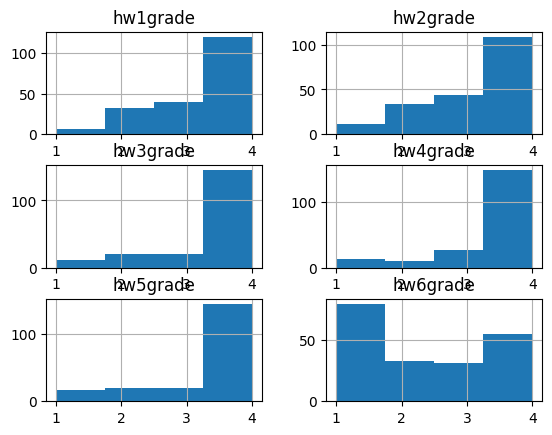

In [72]:
## Associating review quizzes with HW: update grade point by 1 (up to max of 3) if average on relevant quizzes is >=90%

# HW1 Week 1
# HW2 Week 2
# HW3 Week 2 + Week 3
# HW4 Week 4 + Week 5 (No review quiz) + Week 6
# HW5 Week 5 (No review quiz)+ Week 6 + Week 7
# HW6 Week 8 + Week 9 (No review quiz) + Week 10
hw_quizzes = {1:['Week 1 Review Quiz'],2:['Week 2 Review Quiz'],3:['Week 2 Review Quiz','Week 3 Review Quiz'],
              4:['Week 4 Review Quiz','Week 6 Review Quiz'],5:['Week 6 Review Quiz','Week 7 Review Quiz'],
              6:['Week 8 Review Quiz','Week 10 Review Quiz']}

for i in range(1,7):
    grades['hw'+str(i)+'grade'] = grades['hw'+str(i)+'grade'].astype(int)
    grades['hw'+str(i)+'QuizAvg']=grades.loc[:,hw_quizzes[i]].mean(axis=1)

print("Statistics for homework before adjusting for review quiz")
print(grades[['SID','hw1grade','hw2grade','hw3grade','hw4grade','hw5grade','hw6grade']].describe())


#    #If Quiz score for quizzes relevant to a hw is greater than or equal to 90, add one letter grade to homework score, if possible
#    grades.loc[grades['hw'+str(i)+'QuizAvg']>=90,'hw'+str(i)+'grade'] = grades.loc[grades['hw'+str(i)+'QuizAvg'] >= 90,'hw'+str(i)+'grade'].apply(lambda x: min(x + 1, 4))
grades.loc[grades['hw1QuizAvg']>=90,'hw1grade'] = grades.loc[grades['hw1QuizAvg'] >= 90,'hw1grade'].apply(lambda x: min(x + 1, 4))
grades.loc[grades['hw2QuizAvg']>=90,'hw2grade'] = grades.loc[grades['hw2QuizAvg'] >= 90,'hw2grade'].apply(lambda x: min(x + 1, 4))
grades.loc[grades['hw3QuizAvg']>=90,'hw3grade'] = grades.loc[grades['hw3QuizAvg'] >= 90,'hw3grade'].apply(lambda x: min(x + 1, 4))
grades.loc[grades['hw4QuizAvg']>=90,'hw4grade'] = grades.loc[grades['hw4QuizAvg'] >= 90,'hw4grade'].apply(lambda x: min(x + 1, 4))
grades.loc[grades['hw5QuizAvg']>=90,'hw5grade'] = grades.loc[grades['hw5QuizAvg'] >= 90,'hw5grade'].apply(lambda x: min(x + 1, 4))
grades.loc[grades['hw6QuizAvg']>=90,'hw6grade'] = grades.loc[grades['hw6QuizAvg'] >= 90,'hw6grade'].apply(lambda x: min(x + 1, 4))

#print(grades[['hw1','Week 1 Review Quiz','hw1QuizAvg','hw1grade']].head(5))
#print(grades[['hw2','Week 2 Review Quiz','hw2grade']].head(5))
#print(grades[['hw3','Week 2 Review Quiz','Week 3 Review Quiz','hw3QuizAvg','hw3grade']].head(5))
#print(grades[['hw4','Week 4 Review Quiz','Week 6 Review Quiz','hw4QuizAvg','hw4grade']].head(5))
#print(grades[['hw5','Week 6 Review Quiz','Week 7 Review Quiz','hw5QuizAvg','hw5grade']].head(5))
#print(grades[['hw6','Week 8 Review Quiz','Week 10 Review Quiz','hw6QuizAvg','hw6grade']].head(5))
print("Statistics for homework after adjusting for review quiz")
print(grades[['SID','hw1grade','hw2grade','hw3grade','hw4grade','hw5grade','hw6grade']].describe())
print(grades[['SID','hw1grade','hw2grade','hw3grade','hw4grade','hw5grade','hw6grade']].hist(bins=4))


**From Syllabus**

*For Tests*

An **A** means
- A on both tests or A on one of the tests and B on the other

A **B** means
- B or higher on both tests **or** 
- A on one of the tests and C on the other

A **C** means
- C or higher on both tests

In [73]:
## Calculate overall grade point for test component
# Note: for each test, 4 is A, 3 is B, 2 is C, and 1 is failing.

grades['TestGrade'] = grades.apply(lambda row: 
                        4 # Combined test grade greater than or equal to 7 means one is 3 and the other 4 or both are 4
                        if ( (row['Test1grade'] + row['Test2grade']) >=7 )
                        else 3 # Combined test grade 6 when both nonzero means either both 3 or one is 4 and the other is 2
                        if ( (row['Test1grade'] + row['Test2grade']) ==6 ) 
                        else 2 # Combined test grade less than 6 and greater than or equal to 4 means both 2 or one 2 and one 3
                        if ( (row['Test1grade'] + row['Test2grade']) >=4 )
                        else 0 # Combined test grade less than 4 means not both passing
                        , axis=1)

#print(grades[['Test1grade','Test2grade','TestGrade']])

**From Syllabus**

*For Assignments* 

An **A** means
- A on at least 4 homeworks, B or above on at least one homework, any grade on remaining homework

A **B** means
- B or above on at least 4 homeworks, C or above on at least one homework, any grade on remaining homework


A **C** means
- C or above on at least 3 among the homeworks and the project, any grade on rest of assignments. Note: you do not need to pass the project to pass the class if you earn passing grades on at least three assignments (after review quiz credit is factored in).

In [74]:
## Calculate overall grade point for assignment component

# Define variable for all columns whose names start with hw and end with grade
hw_cols = [col for col in grades.columns if col.startswith('hw') and col.endswith('grade')]
# Calculate number of assignments at each achievement level
grades['HW As'] = grades.loc[:, hw_cols].apply(lambda row: len(row[row == 4.0]), axis=1)
grades['HW Bs'] = grades.loc[:, hw_cols].apply(lambda row: len(row[row == 3.0]), axis=1)
grades['HW Cs'] = grades.loc[:, hw_cols].apply(lambda row: len(row[row == 2.0]), axis=1)
grades['HW and Project at least Cs'] = grades.loc[:, hw_cols+['Projectgrade']].apply(lambda row: len(row[row >= 2.0]), axis=1)
grades['HW Fs'] = grades.loc[:, hw_cols].apply(lambda row: len(row[row == 0.0]), axis=1)

grades['HWGrade'] = grades.apply(lambda row: 4 #A on at least 4 homeworks, B or above on at least one homework, any grade on remaining homework
                             if ( (row['HW As'] >= 4) & ((row['HW Bs'] + row['HW As']) >=5))
                             else 3 #B or above on at least 4 homeworks, C or above on at least one homework, any grade on remaining homework
                             if ( ((row['HW Bs'] + row['HW As']) >=4) & ((row['HW Cs'] + row['HW Bs'] + row['HW As']) >=5))
                             else 2 #C or above on at least three of the HWs and project
                             if (row['HW and Project at least Cs'] >= 3)
                             else 0, axis=1)

print(grades.loc[[1]][hw_cols+['Projectgrade','HW As','HW Bs','HW Cs','HW and Project at least Cs','HWGrade']])


   hw1grade  hw2grade  hw3grade  hw4grade  hw5grade  hw6grade Projectgrade  \
1         2         3         2         3         1         4            4   

   HW As  HW Bs  HW Cs  HW and Project at least Cs  HWGrade  
1      1      2      2                           6        2  


In [75]:
## Calculate letter grades and add +/- modifiers. 
## For A level grades, need to be on starred project list for an A+
## For A level grades, - if project is at B or C level
## For B level grades, + if project is at A level
## For B level grades, - if project is at C level
## For C level grades, + if project is a at B or A level

grades['Grade'] = grades.apply(lambda row: 4
                        if ( (row['TestGrade'] == 4) & (row['HWGrade'] == 4))
                        else 3
                        if ( (row['TestGrade'] >= 3) & (row['HWGrade'] >= 3)) 
                        else 2
                        if ( (row['TestGrade'] >= 2) & (row['HWGrade'] >=2))
                        else 0, axis=1)

grades['LetterGrade'] = grades.apply(lambda row: 'A'
                        if (( row['Grade']==4) & (row['Projectgrade']==4))
                        else 'A-'
                        if ((row['Grade']== 4) & (row['Projectgrade']<4))
                        else 'B+'
                        if ((row['Grade']== 3) & (row['Projectgrade']>3))
                        else 'B'
                        if ((row['Grade']== 3) & (row['Projectgrade']==3))
                        else 'B-'
                        if ((row['Grade']== 3) & (row['Projectgrade']<3))
                        else 'C+'
                        if ((row['Grade']== 2) & (row['Projectgrade']>2))
                        else 'C'
                        if ((row['Grade']== 2) & (row['Projectgrade']==2))
                        else 'C-'
                        if ((row['Grade']== 2) & (row['Projectgrade']<2))
                        else 'F', axis=1)

print(grades.loc[[1]][['Inclass1','Inclass1grade','Inclass2','Inclass2grade','Final1','Final1grade','Final2','Final2grade','TestGrade']].transpose())

                  1
Inclass1       66.0
Inclass1grade   2.0
Inclass2       76.0
Inclass2grade   2.0
Final1         66.0
Final1grade     3.0
Final2          0.0
Final2grade     1.0
TestGrade       2.0


            Grade
count  199.000000
mean     2.768844
std      1.213074
min      0.000000
25%      2.000000
50%      3.000000
75%      4.000000
max      4.000000
Grade
0    18
2    66
3    41
4    74
dtype: int64
LetterGrade
A     51
A-    23
B      8
B+    28
B-     5
C     15
C+    45
C-     6
F     18
dtype: int64


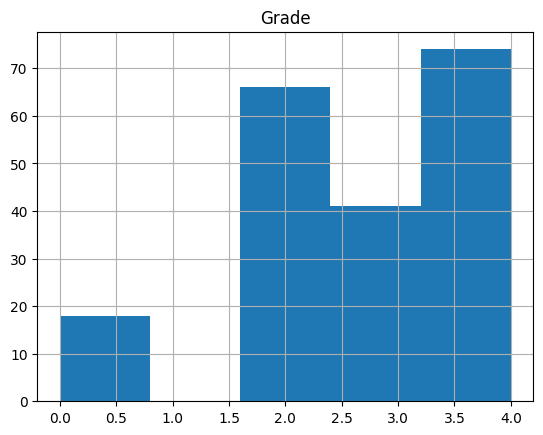

In [76]:
## Distribution
histData = grades[['SID','Grade','LetterGrade']]
print(histData.describe())
print(histData.groupby(['Grade']).size())
print(histData.groupby(['LetterGrade']).size())
hist = grades[['SID','Grade']].hist(bins=5)

In [77]:
# Understanding students with failing grade

print("Grades when HW grade and Test grade both failing")
failBecauseBoth = grades[['SID', 'First Name', 'Last Name', 'TestGrade', 'HWGrade','Projectgrade']].loc[ (grades['HWGrade']==0) & (grades['TestGrade'] ==0)]
print(failBecauseBoth)

print("Grades when HW grade failing and Test grade passing")
failBecauseHW = grades[['SID', 'First Name', 'Last Name', 'TestGrade', 'HWGrade','Projectgrade']].loc[ (grades['HWGrade']==0) & (grades['TestGrade'] > 0)]
print(failBecauseHW)

print("Grades when Test grade failing and HW grade passing")
failBecauseTest = grades[['SID', 'First Name', 'Last Name', 'TestGrade', 'HWGrade','Projectgrade']].loc[ (grades['HWGrade']>0) & (grades['TestGrade'] == 0)]
print(failBecauseTest)
#print(failData.describe())
#print(histData.groupby(['Grade']).size())
#print(histData.groupby(['GradeRel']).size())
#hist = grades[['SID','Grade','GradeRel']].hist(bins=5)

Grades when HW grade and Test grade both failing
           SID First Name      Last Name  TestGrade  HWGrade Projectgrade
35   A17641319     Cankai          Zhang          0        0            1
85   A17848807     Ismayl          Clark          0        0            1
87   A17963092       Jack  Morales-Ortiz          0        0            1
119  A17984730  Klimentiy          Yugay          0        0            1
124  U09885597   MYUNGSEO            KIM          0        0            1
Grades when HW grade failing and Test grade passing
Empty DataFrame
Columns: [SID, First Name, Last Name, TestGrade, HWGrade, Projectgrade]
Index: []
Grades when Test grade failing and HW grade passing
           SID First Name  Last Name  TestGrade  HWGrade Projectgrade
34   A15922059    Cameron     Thomas          0        4            3
47   A17323214     Dayrin  Gutierrez          0        2            3
49   A18043566    Derrick     Burton          0        3            4
72   A16717957      Glenn

In [78]:
## Audit
auditKeys = [17, 22, 31, 34, 49, 57, 60, 73, 75, 80, 91, 92, 96, 97, 108, 132, 140, 145, 147, 158, 164, 190, 198]

for key in auditKeys:
    print(grades.loc[[key]][['SID', 'Last Name', 'TestGrade', 'HWGrade',  'Grade', 'LetterGrade',
                                  'hw1','hw2','hw3','hw4','hw5','hw6','Project','Inclass1','Inclass2','Final1','Final2']].transpose())
    #print(grades.loc[[auditKey]][hw_cols+['Projectgrade','Inclass1','Inclass2','Final1','Final2']].transpose())

                    17
SID          A17851516
Last Name          Dev
TestGrade            2
HWGrade              4
Grade                2
LetterGrade         C+
hw1          73.333333
hw2               95.0
hw3          97.777778
hw4          96.363636
hw5               98.0
hw6                0.0
Project          100.0
Inclass1          74.0
Inclass2          68.0
Final1             0.0
Final2             0.0
                    22
SID          A17913980
Last Name    Fernandez
TestGrade            4
HWGrade              2
Grade                2
LetterGrade          C
hw1          66.666667
hw2               75.0
hw3          53.333333
hw4          67.272727
hw5               86.0
hw6                0.0
Project           78.0
Inclass1          82.0
Inclass2          68.0
Final1             0.0
Final2            86.0
                     31
SID           A17872293
Last Name    Canonizado
TestGrade             2
HWGrade               2
Grade                 2
LetterGrade          C-
hw1 

In [79]:
grades.columns

Index(['First Name', 'Last Name', 'SID', 'Email', 'Final1', 'Inclass1',
       'Final2', 'Inclass2', 'hw1', 'hw2', 'hw3', 'hw4', 'hw5', 'hw6',
       'Project', 'Week 1 Review Quiz', 'Week 2 Review Quiz',
       'Week 3 Review Quiz', 'Week 4 Review Quiz', 'Week 6 Review Quiz',
       'Week 7 Review Quiz', 'Week 8 Review Quiz', 'Week 10 Review Quiz',
       'hw1grade', 'hw2grade', 'hw3grade', 'hw4grade', 'hw5grade', 'hw6grade',
       'Projectgrade', 'Inclass1grade', 'Inclass2grade', 'Final1grade',
       'Final2grade', 'Test1grade', 'Test2grade', 'hw1QuizAvg', 'hw2QuizAvg',
       'hw3QuizAvg', 'hw4QuizAvg', 'hw5QuizAvg', 'hw6QuizAvg', 'TestGrade',
       'HW As', 'HW Bs', 'HW Cs', 'HW and Project at least Cs', 'HW Fs',
       'HWGrade', 'Grade', 'LetterGrade'],
      dtype='object')

In [80]:
#Output sorted columns to CSV for review
grades[['First Name', 'Last Name', 'SID', 'Email','LetterGrade','Grade','TestGrade','HWGrade',
        'Inclass1', 'Inclass2','Final1', 'Final2', 'Project', 
        'hw1', 'hw1QuizAvg', 'hw2', 'hw2QuizAvg','hw3', 'hw3QuizAvg', 'hw4','hw4QuizAvg',  'hw5',  'hw5QuizAvg', 'hw6','hw6QuizAvg', 
        'hw1grade', 'hw2grade', 'hw3grade', 'hw4grade', 'hw5grade', 'hw6grade','Projectgrade', 
        'Inclass1grade', 'Inclass2grade', 'Final1grade','Final2grade', 'Test1grade', 'Test2grade',
        'Week 1 Review Quiz', 'Week 2 Review Quiz',
        'Week 3 Review Quiz', 'Week 4 Review Quiz', 'Week 6 Review Quiz',
        'Week 7 Review Quiz', 'Week 8 Review Quiz', 'Week 10 Review Quiz']].to_csv("CSE20S24.grades.csv")